# Introduction to Time Series Forecasting

## Learning Objectives
By the end of this notebook, you will be able to:
1. Understand what time series data is and why it matters
2. Recognize real-world applications of time series forecasting
3. Load and prepare time series data in Python
4. Create basic visualizations of time series data
5. Identify key characteristics that make time series unique


## Introduction: Why Time Series Forecasting Matters

Imagine you're a retail manager planning inventory for the holiday season. You know that sales spike every December, but by how much? Should you order 10% more products or 50% more? Making the wrong decision could mean empty shelves (lost sales) or overstocked warehouses (wasted money).

**This is exactly what time series forecasting helps us solve.**

Time series forecasting helps us look at what happened before so we can predict what will happen next. It's like noticing your own routine—if you usually check your phone every morning, it's safe to predict you'll check it tomorrow too.

**Real-world impact:**
- Retailers use time series forecasting to predict holiday demand so shelves don't empty out
- Hospitals forecast patient volume by hour to avoid ER overcrowding
- Energy companies predict electricity demand to prevent blackouts
- Financial institutions forecast stock prices and interest rates
- Call centers predict call volume to schedule the right number of staff

**Think About It:** Can you think of other situations where predicting future values based on past patterns would be valuable? What about:
- Website traffic planning
- Supply chain management
- Sales forecasting
- Weather prediction

In this notebook, you'll learn the fundamentals of time series data and how to work with it in Python.


## Section 1: What is Time Series Data?

Before we dive into forecasting, let's understand what makes time series data special.

### Time Series vs. Regular Data

A **time series** is a sequence of observations measured over time. Unlike regular datasets where the order doesn't matter, time series data has a specific order that gives it meaning.

**Key Characteristics:**

1. **Temporal Order Matters:** The sequence of data points is crucial. Yesterday influences today, and today influences tomorrow.

2. **Autocorrelation:** Past values affect future values. If sales were high last month, they might be high this month too.

3. **Patterns Over Time:** Time series often show trends (long-term direction), seasonality (repeating patterns), and noise (random variation).

### Examples of Time Series Data

**Daily:**
- Stock prices
- Website visits
- Temperature readings

**Weekly:**
- Sales reports
- Employee attendance
- Traffic patterns

**Monthly:**
- Revenue
- Customer counts
- Production output

**Hourly:**
- Call center volume
- Energy consumption
- Server load

### How Time Series Differs From Regression

| **Time Series** | **Regression** |
|-----------------|-----------------|
| Predicts based on past values | Predicts based on other variables |
| Order matters—can't shuffle | Order doesn't matter |
| Yesterday influences today | Features influence target |
| Must respect time in train/test split | Can randomly split data |
| Handles trends and seasonality | Assumes independence |

**Real-World Example:**
A sports team predicting ticket sales would use time series (looking at past games, trends, seasonal patterns like holidays) rather than regression (using features like weather, opponent strength).


## Section 2: Loading Time Series Data

Now let's learn how to load and prepare time series data in Python. This is the first step in any time series analysis.


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style for better-looking graphs
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully")
print("Ready to work with time series data")


Libraries imported successfully
Ready to work with time series data


### Loading Data from CSV

Time series data often comes in CSV files. The key is to make sure Python recognizes the date column as a date, not just text. This is crucial for time series analysis.


In [9]:
# Load the AirPassengers dataset
# This dataset contains monthly airline passenger counts from 1949 to 1960
data = pd.read_csv('AirPassengers.csv')

print("✅ Dataset loaded successfully")
print(f"\nDataset shape: {data.shape}")
print(f"Number of months: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")


✅ Dataset loaded successfully

Dataset shape: (144, 2)
Number of months: 144
Number of columns: 2


### Examining the Data

Let's take a look at what we're working with:


In [10]:
# Display the first few rows
print("First 10 rows of the dataset:")
data.head(10)


First 10 rows of the dataset:


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [11]:
# Get basic information about the dataset
print("Dataset Information:")
print("=" * 50)
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


### Preparing the Time Index

For time series analysis, we need to convert the date column to a proper date format and set it as the index. This allows Python to understand the time component of our data.


In [12]:
# Convert the Month column to datetime format
# This tells Python that 'Month' contains dates, not just text
data['Month'] = pd.to_datetime(data['Month'])

# Set Month as the index
# This makes it easier to work with time-based operations
data.set_index('Month', inplace=True)

print("✅ Time index set successfully")
print(f"\nDate range: {data.index.min()} to {data.index.max()}")
print(f"Total months: {len(data)}")
print(f"\nFirst few rows with date index:")
data.head()


✅ Time index set successfully

Date range: 1949-01-01 00:00:00 to 1960-12-01 00:00:00
Total months: 144

First few rows with date index:


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Understanding Our Data

Let's get some basic statistics about our passenger data:


In [13]:
# Get summary statistics
print("Summary Statistics:")
print("=" * 50)
print(data.describe())

print(f"\n📊 Key Insights:")
print(f"Minimum passengers: {data['#Passengers'].min():,.0f}")
print(f"Maximum passengers: {data['#Passengers'].max():,.0f}")
print(f"Average passengers: {data['#Passengers'].mean():,.0f}")
print(f"\nThe number of passengers ranges from {data['#Passengers'].min():,.0f} to {data['#Passengers'].max():,.0f}")
print(f"This represents a {((data['#Passengers'].max() / data['#Passengers'].min()) - 1) * 100:.0f}% increase over the time period")


Summary Statistics:
       #Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000

📊 Key Insights:
Minimum passengers: 104
Maximum passengers: 622
Average passengers: 280

The number of passengers ranges from 104 to 622
This represents a 498% increase over the time period


## Section 3: Visualizing Time Series Data

**Visualization is the foundation of time series analysis.** Before we build any models, we need to see what our data looks like. A simple line plot can reveal trends, seasonality, and patterns that numbers alone can't show.

### Why Visualization Matters First

1. **See the Big Picture:** A graph shows the overall pattern at a glance
2. **Identify Trends:** Is the data going up, down, or staying flat?
3. **Spot Seasonality:** Are there repeating patterns (like higher sales every December)?
4. **Detect Anomalies:** Unusual spikes or drops stand out visually
5. **Guide Model Choice:** What you see in the plot helps you choose the right forecasting method

**Think About It:** Would you rather look at 144 numbers or one graph? The graph tells the story instantly.


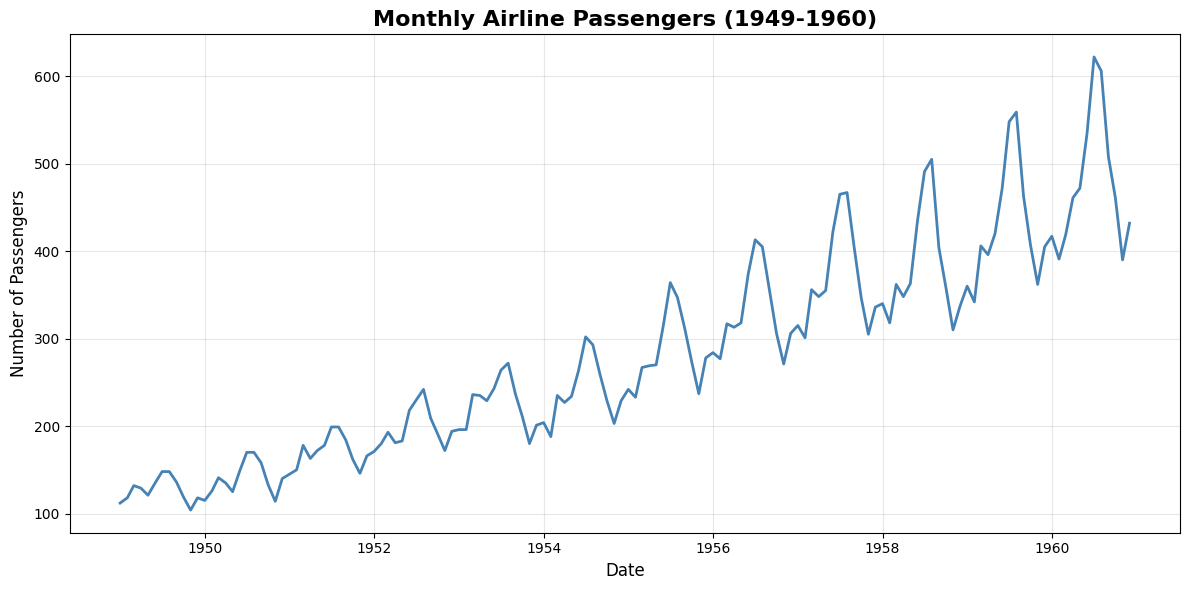


🔍 What do you notice in this plot?
- Is there a general trend (upward or downward)?
- Do you see any repeating patterns?
- Are there any unusual spikes or drops?


In [14]:
# Create a simple line plot of the time series
# This is the most basic and important visualization for time series data

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['#Passengers'], linewidth=2, color='steelblue')
plt.title('Monthly Airline Passengers (1949-1960)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🔍 What do you notice in this plot?")
print("- Is there a general trend (upward or downward)?")
print("- Do you see any repeating patterns?")
print("- Are there any unusual spikes or drops?")


### Key Observations from the Plot

Looking at our airline passenger data, we can see:

1. **Upward Trend:** The overall number of passengers is increasing over time
2. **Seasonal Pattern:** There appear to be regular peaks and valleys (likely summer peaks, winter lows)
3. **Growth Over Time:** The peaks are getting higher each year, suggesting growth

**Business Insight:** This airline is growing. But the growth isn't steady—it has seasonal patterns. Understanding these patterns will help us forecast future passenger counts more accurately.


## Section 4: Key Characteristics of Time Series

Now that we've seen our data, let's understand the key characteristics that make time series unique:

### 1. Temporal Order

**The order of data points matters.** You can't shuffle time series data like you can with regular datasets.

**Example:**
- Regular data: [Apple, Banana, Cherry] = [Cherry, Apple, Banana] (order doesn't matter)
- Time series: [Jan: 100, Feb: 120, Mar: 110] ≠ [Mar: 110, Jan: 100, Feb: 120] (order matters!)

**Why it matters:** Yesterday's sales influence today's sales. If we shuffle the data, we lose this relationship.

### 2. Autocorrelation (Memory)

**Past values affect future values.** This is called "memory" in time series.

**Example:**
- If sales were high last month, they might be high this month too
- If it rained yesterday, it might rain today (weather has memory)

**Business Example:**
A successful marketing campaign in January might boost sales in February because customers remember the brand.

### 3. Trends

**Long-term direction of the data.** Is it generally going up, down, or staying flat?

**Examples:**
- Upward trend: Company revenue growing year over year
- Downward trend: Product sales declining as it becomes obsolete
- Flat trend: Stable customer base with no growth or decline

### 4. Seasonality

**Repeating patterns at regular intervals.**

**Examples:**
- **Yearly:** Ice cream sales peak every summer
- **Monthly:** Payroll expenses spike at month-end
- **Weekly:** Restaurant traffic higher on weekends
- **Daily:** Website traffic peaks at lunchtime

### 5. Noise (Random Variation)

**Unpredictable fluctuations** that we can't explain with trends or seasonality.

**Examples:**
- A single customer making a huge purchase (can't predict)
- Unexpected weather affecting sales
- Random events that don't follow patterns

**Think About It:** In our airline passenger data, what might cause "noise"? Maybe a special event, news story, or unexpected promotion?


## Section 5: Real-World Applications

Time series forecasting is used in almost every industry. Here are some practical examples:

### Retail & E-commerce
- **Inventory Planning:** How much stock to order for the holiday season
- **Demand Forecasting:** Predicting which products will sell well
- **Staffing:** Scheduling employees based on predicted customer traffic

### Healthcare
- **Patient Volume:** Forecasting ER visits to prevent overcrowding
- **Resource Planning:** Predicting need for hospital beds, equipment
- **Disease Tracking:** Monitoring and predicting disease outbreaks

### Finance
- **Stock Prices:** Predicting future stock values (with limitations)
- **Interest Rates:** Forecasting economic indicators
- **Risk Management:** Predicting loan defaults over time

### Energy & Utilities
- **Energy Demand:** Predicting electricity usage to prevent blackouts
- **Renewable Energy:** Forecasting solar/wind power generation
- **Water Management:** Predicting water consumption patterns

### Technology
- **Website Traffic:** Predicting server load and capacity needs
- **Call Centers:** Forecasting call volume for staffing
- **Cloud Services:** Predicting resource usage and costs

**Think About It:** Can you think of a time series problem in your own work or daily life?


## Summary: Key Takeaways

This notebook introduced you to the fundamentals of time series forecasting:

### What We Learned

1. **Time Series Definition:** A sequence of observations measured over time where order matters

2. **Key Characteristics:**
   - Temporal order (can't shuffle the data)
   - Autocorrelation (past affects future)
   - Trends (long-term direction)
   - Seasonality (repeating patterns)
   - Noise (random variation)

3. **Data Loading:** How to load CSV files and set up proper date indexes for time series analysis

4. **Visualization:** The importance of plotting data first to see patterns before building models

5. **Real-World Applications:** Time series forecasting is used across industries for planning and decision-making

### Key Insights

- **Visualization is critical:** Always plot your data first to understand patterns
- **Order matters:** Time series data must respect chronological order
- **Patterns are everywhere:** Most business data has trends and seasonality
- **Forecasting helps planning:** Businesses use predictions to make better decisions

### Next Steps

In the next notebook, we'll dive deeper into understanding the components of time series (trend, seasonality, and noise) and learn how to identify them in our data.

**Remember:** Good forecasting starts with understanding your data. Always visualize first.
